# Logistic Regression for Binary Classification

The problem is to estimate an applicant’s probability of admission into a university based on his/her results on two exams.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as opt

data = np.loadtxt('data/university_admission.txt', delimiter = ',')
x = data[:, 0:2]      # The first two columns correspond to the exam scores
y = data[:, 2]        # The third column indicates whether the applicant has been admitted to the university
print(data[:5])

[[34.62365962 78.02469282  0.        ]
 [30.28671077 43.89499752  0.        ]
 [35.84740877 72.90219803  0.        ]
 [60.18259939 86.3085521   1.        ]
 [79.03273605 75.34437644  1.        ]]


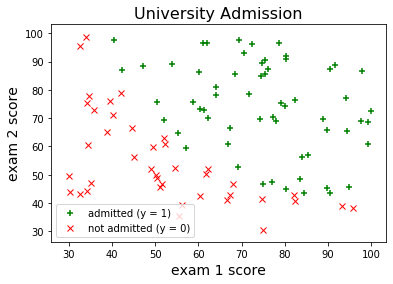

In [2]:
fig, ax = plt.subplots()
positives = np.where(y == 1)
negatives = np.where(y == 0)
ax.scatter(x[positives, 0], x[positives, 1], marker = '+', c = 'green')
ax.scatter(x[negatives, 0], x[negatives, 1], marker = 'x', c = 'red', linewidth = 1)
plt.title('University Admission', fontsize = 16)
plt.xlabel('exam 1 score', fontsize = 14)
plt.ylabel('exam 2 score', fontsize = 14)
plt.legend(['admitted (y = 1)', 'not admitted (y = 0)']);

**Logistic regression** is a **linear model**, which means that the **decision boundary** has to be a straight line.

This can be achieved with a a simple hypothesis function in the following form:

$$h_\theta(x) = g(\theta^\top x)$$

where $g$ is the **sigmoid function** which is defined as:

$$g(z) = \frac{1}{1 + e^{−z}}$$

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

The numeric output of the hypothesis function $h_\theta(x)$ corresponds to the model’s confidence in labeling the input:

1. If the output is **0.5**, both classes are equally probable as far as the classifier is concerned.
2. If the output is **1**, the classifier is 100% confident about class 1.
3. If the output is **0**, the classifier is 100% confident about class 0.

In other words, the classifier labels the input based on whether $\theta^\top x$ is positive or negative. Of course this is based on the assumption that the treshold is selected as **0.5**.

### Cost Function

In the training stage, we’ll minimize the **cost function**:

$$J(\theta) = \frac{1}{m} \sum_{i = 1}^m [−y^{(i)} \, log(h_\theta(x^{(i)})) − (1 − y^{(i)}) \, log(1 − h_\theta(x^{(i)}))]$$

Notice that this cost function penalizes (German: *bestrafen*) the hypothesis according to its probability estimation error, as demonstrated below:



In [4]:
def cost(theta, X, y):
    predictions = sigmoid(X @ theta)
    predictions[predictions == 1] = 0.999              # log(1) = 0 causes division error during optimization
    error = -y * np.log(predictions) - (1 - y) * np.log(1 - predictions);
    return sum(error) / len(y);

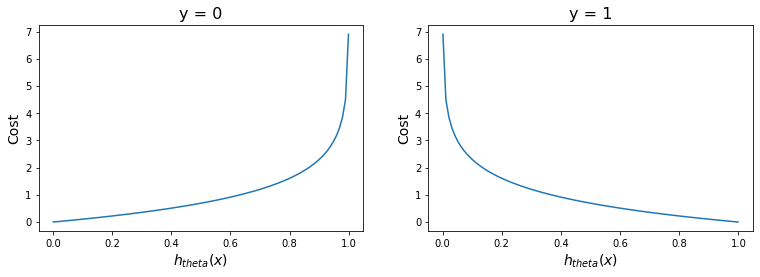

In [5]:
def y_axis(x, y):
    return -y * np.log(x) - (1 - y) * np.log(1 - x)

x_axis = np.linspace(0.001, 0.999 ,100)
plt.figure(figsize=(12.8, 3.8))

plt.subplot(1,2,1)
plt.title('y = 0', fontsize = 16)
plt.xlabel('$h_{theta}(x)$', fontsize = 14)
plt.ylabel('Cost', fontsize = 14)
plt.plot(x_axis, y_axis(x_axis, 0))

plt.subplot(1,2,2)
plt.title('y = 1', fontsize = 16)
plt.xlabel('$h_{theta}(x)$', fontsize = 14)
plt.ylabel('Cost', fontsize = 14)
plt.plot(x_axis, y_axis(x_axis, 1));

The **cost function gradient** is

$$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=0}^m (h_\theta(x^{(i)}) - y^{(i)}) \, x_j^{(i)}$$

<div class="alert alert-block alert-warning">TODO: detailed derivative (see Lession 24. "Gradien Descent")</div>

In [6]:
def cost_gradient(theta, X, y):
    predictions = sigmoid(X @ theta);
    return X.transpose() @ (predictions - y) / len(y)

Add an additional first column to $x$, in order to account for the intercept term $\theta_0$:

In [7]:
X = np.ones(shape=(x.shape[0], x.shape[1] + 1))
X[:, 1:] = x

In [8]:
X[:2]  # two first data sets

array([[ 1.        , 34.62365962, 78.02469282],
       [ 1.        , 30.28671077, 43.89499752]])

Set initial model parameters $\theta$ to zero:

In [9]:
num_iters = 100
alpha = 0.001

theta = np.zeros(X.shape[1])
theta = opt.fmin_cg(cost, theta, cost_gradient, (X, y))
#cost_history = np.zeros(num_iters)

#for n in range(num_iters):
#    cost_history[n] = cost(theta, X, y)
#    theta -= alpha * cost_gradient(theta, X, y)

#plt.plot(cost_history, linewidth=2);

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 46
         Function evaluations: 109
         Gradient evaluations: 109


<div class="alert alert-block alert-warning">TODO: why is it not working? See Udacity Lesson 27. Notebook: "Gradient Descent"</div>

Plot the **decision boundary** of our optimized model:

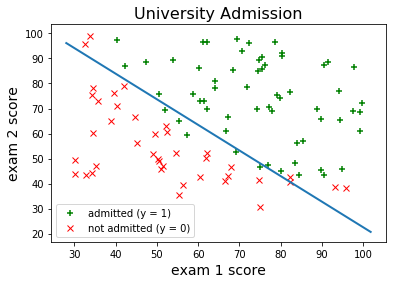

In [10]:
x_axis = np.array([min(X[:, 1]) - 2, max(X[:, 1]) + 2])
y_axis = (-1 / theta[2]) * (theta[1] * x_axis + theta[0])
ax.plot(x_axis, y_axis, linewidth=2)
fig

### Training Accuracy

In [11]:
predictions = np.zeros(len(y))
predictions[sigmoid(X @ theta) >= 0.5] = 1
print("Training Accuracy =", str(np.mean(predictions == y) * 100) + "%")

Training Accuracy = 89.0%


### Prediction 

In [12]:
probability = sigmoid(np.array([1, 45, 85]) @ theta)
print("For a student with scores 45 and 85, we predict an admission probability of", probability)

For a student with scores 45 and 85, we predict an admission probability of 0.7762911761174557
